---
# Metin Ön işleme ve Görselleştirme
---

## Problem : Wikipedia metinleri içeren veri setine metin ön işleme ve görselleştirme yapınız.

In [1]:
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import Word, TextBlob
from wordcloud import WordCloud

In [2]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [16]:
df = pd.read_csv("wiki_data.csv", index_col=0)

In [17]:
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [18]:
df.shape

(10859, 1)

### Metin ön işleme için clean_text adında fonksiyon oluşturunuz. Fonksiyon;
#### - Büyük küçük harf dönüşümü,
#### - Noktalama işaretlerini çıkarma,
#### - Numerik ifadeleri çıkarma Işlemlerini gerçekleştirmeli.

In [19]:
def clean_text(text):
    # Normalizing Case Folding
    text = text.str.lower()
    # Punctuations
    text = text.str.replace(r'[^\w\s]', '', regex=True)
    text = text.str.replace("\n" , '', regex=True)
    # Numbers
    text = text.str.replace('\d', '', regex=True)
    return text

df["text"] = clean_text(df["text"])

In [20]:
df.head()

,text
1,anovoanovo formerly a novo is a computer servi...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june ...
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...


### Metin içinde öznitelik çıkarımı yaparken önemli olmayan kelimeleri çıkaracak remove_stopwords adında fonksiyon yazınız.

In [24]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    text = text.apply(lambda x: ' '.join([x for x in str(x).split() if x not in stop_words]))
    return text
df["text"] = remove_stopwords(df["text"])

In [25]:
# Metinde az geçen (1000'den az, 2000'den az gibi) kelimeleri bulunuz. Ve bu kelimeleri metin içerisinden çıkartınız.

temp_df = pd.Series(' '.join(df['text']).split()).value_counts()

In [26]:
temp_df

used               29034
also               22786
use                16461
â                  15383
one                15167
                   ...  
rockcrawling           1
truggies               1
usetransfer            1
coloradovarious        1
tppn                   1
Name: count, Length: 265377, dtype: int64

In [27]:
drops = temp_df[temp_df < 1000]

In [28]:
df["text"] = df["text"].apply(lambda x: ' '.join(x for x in x.split() if x not in drops))

In [29]:
df.head()

,text
1,computer services company based france founded...
2,battery battery also known battery device info...
3,august â â june analog integrated circuit desi...
4,military became april part allows access knowl...
5,scientific instrument used lower camera turn l...


In [30]:
# Metinleri tokenize edip sonuçları gözlemleyiniz.

df["text"].apply(lambda x: TextBlob(x).words)

1        [computer, services, company, based, france, f...
2        [battery, battery, also, known, battery, devic...
3        [august, â, â, june, analog, integrated, circu...
4        [military, became, april, part, allows, access...
5        [scientific, instrument, used, lower, camera, ...
                               ...                        
10855    [company, wireless, audio, technologies, consu...
10856    [input, signal, frequency, within, full, frequ...
10857    [technology, term, used, national, combination...
10858    [network, usually, system, wind, installed, si...
10859    [transfer, transfer, case, part, multiple, pow...
Name: text, Length: 10859, dtype: object

In [31]:
# Lemmatization işlemi yapınız.

def lemmatize_text(text):
    text = text.apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
    return text
df["text"] = lemmatize_text(df["text"])

In [32]:
df.head()

,text
1,computer service company based france founded ...
2,battery battery also known battery device info...
3,august â â june analog integrated circuit desi...
4,military became april part allows access knowl...
5,scientific instrument used lower camera turn l...


### Veriyi Görselleştiriniz
- Metindeki terimlerin frekanslarını hesaplayınız.
- Bir önceki adımda bulduğunuz terim frekanslarının Barplot grafiğini oluşturunuz.
- Kelimeleri WordCloud ile görselleştiriniz.

In [33]:
tf = df["text"].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()

In [34]:
tf.columns = ["words", "tf"]

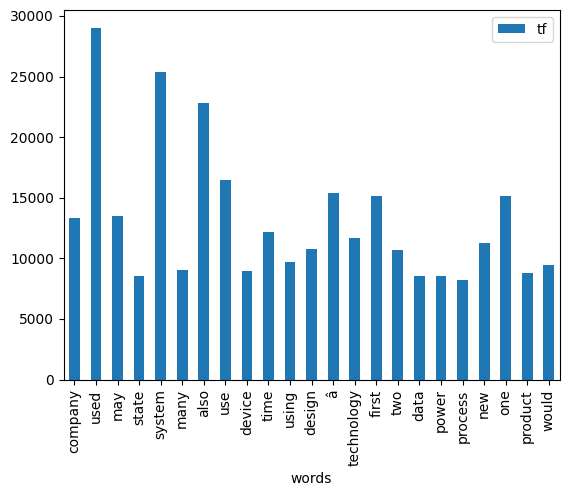

In [37]:
tf[tf["tf"] > 8000].plot.bar(x="words", y="tf")
plt.show()

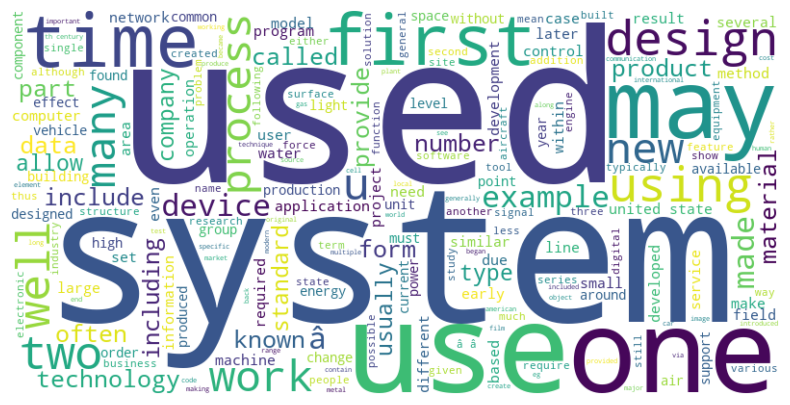

In [38]:
text = " ".join(i for i in df["text"]) # kelimeleri birleştir
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Tüm Aşamaları Tek Bir Fonksiyon Olarak Yazınız 
- Metin ön işleme işlemlerini gerçekleştiriniz.
- Görselleştirme işlemlerini fonksiyona argüman olarak ekleyiniz.
- Fonksiyonu açıklayan 'docstring' yazınız.

In [3]:
df = pd.read_csv("wiki_data.csv", index_col=0)

Barplot oluşturuluyor...


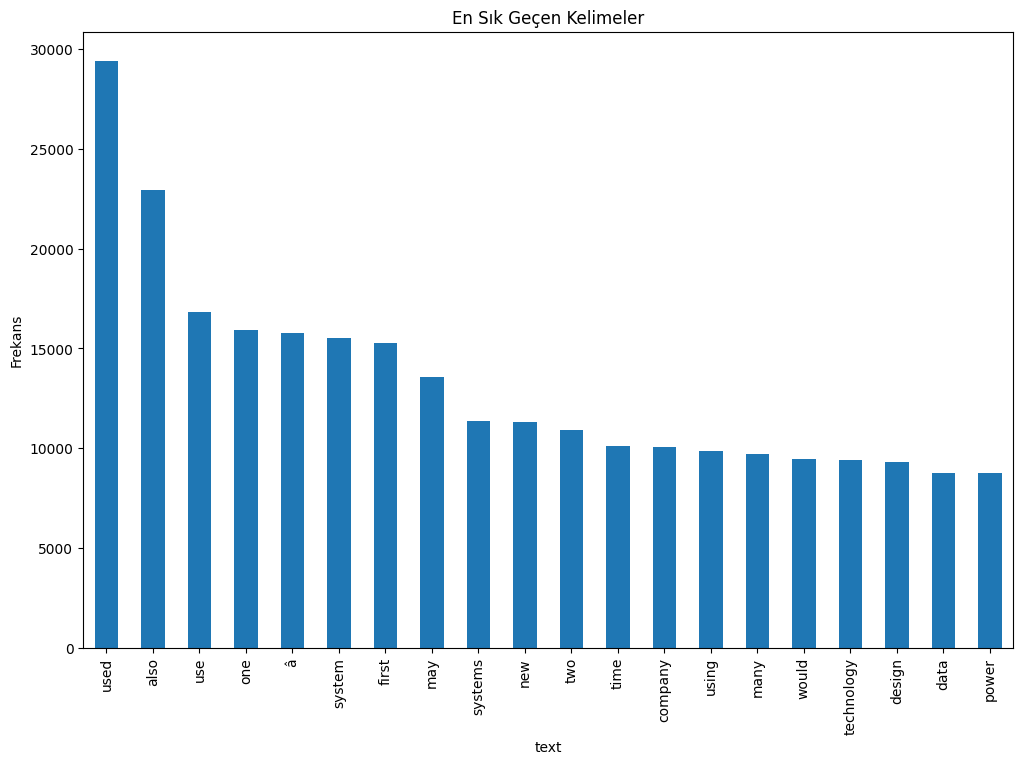

WordCloud oluşturuluyor...


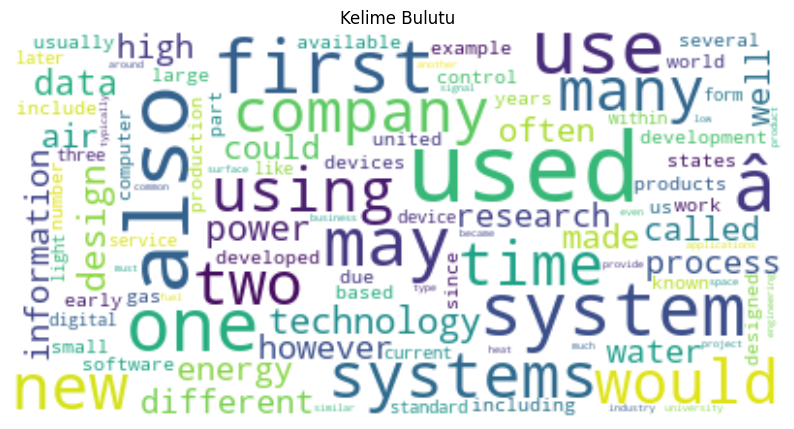


İşlenmiş Metin:
1        anovo anovo formerly novo computer services co...
2        battery indicator battery indicator also known...
3        bob pease robert allen pease august â â june a...
4        cavnet cavnet secure military forum became ope...
5        clidar clidar scientific instrument used measu...
                               ...                        
10855    soundcast soundcast llc privately funded compa...
10856    spectrum analyzer spectrum analyzer measures m...
10857    telepresence technology telepresence technolog...
10858    transpacific profiler network transpacific pro...
10859    transfer case transfer case part drivetrain fo...
Name: text, Length: 10859, dtype: object


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import re # Regex işlemleri için re kütüphanesini import edelim

def wiki_processing_optimized(text_series: pd.Series, barplot=False, wordcloud=False):
    """
    Wiki metinlerini verimli bir şekilde işleme fonksiyonu.

    Args:
        text_series (pd.Series): İşlenecek metinleri içeren Pandas Serisi.
        barplot (bool): Kelime frekanslarını barplot olarak gösterir.
        wordcloud (bool): Kelime bulutunu gösterir.

    Returns:
        pd.Series: İşlenmiş metin verisi.

    Raises:
        ValueError: Eğer text_series boş ise hata fırlatır.
    
    Example:
        >>> processed_text = wiki_processing_optimized(df['text'], barplot=True, wordcloud=True)
        İşlenmiş metin verisi döner ve grafikleri gösterir.
    """
    if text_series.empty:
        raise ValueError("Girdi olarak verilen metin serisi (text_series) boş olamaz.")

    # 1. Adım: Temel Metin Temizleme (Vektörel - Hızlı)
    # Tüm işlemleri tek seferde zincirleyerek yapmak daha verimlidir.
    processed_text = text_series.str.lower()
    processed_text = processed_text.str.replace(r'[^\w\s]', '', regex=True) # Noktalama işaretleri
    processed_text = processed_text.str.replace(r'\d+', '', regex=True)     # Sayılar
    processed_text = processed_text.str.replace(r'\n', ' ', regex=True)     # Yeni satır karakterleri

    # 2. Adım: Stopwords ve Nadir Kelimeleri Belirleme
    # Stopwords listesini bir sete çevirmek, arama hızını artırır (O(1) karmaşıklık)
    sw = set(stopwords.words('english'))

    # Kelime frekanslarını hesaplayarak nadir kelimeleri bulma
    # Önce tüm kelimeleri bir seriye ayıralım ('explode' ile)
    all_words = processed_text.str.split().explode()
    
    # Frekansları hesaplayalım
    word_counts = all_words.value_counts()
    
    # Nadir kelimeleri (örneğin 1 kez geçenler) belirleyelim
    # Not: [-1000:] yerine frekansı 1 olanları almak daha mantıklı olabilir.
    # Büyük veri setlerinde bu sayıyı ayarlayabilirsiniz.
    rare_words = set(word_counts[word_counts <= 1].index)
    
    # Temizlenecek tüm kelimeleri birleştirelim
    words_to_remove = sw.union(rare_words)

    # 3. Adım: Stopwords ve Nadir Kelimeleri Temizleme (Tek .apply ile)
    processed_text = processed_text.apply(
        lambda x: " ".join(word for word in x.split() if word not in words_to_remove)
    )

    # Temizlenmiş metin boşsa, daha fazla işlem yapma
    if processed_text.str.len().sum() == 0:
        print("Temizleme sonrası metin kalmadı, grafikler oluşturulamıyor.")
        return processed_text

    # 4. Adım: Grafikleri Oluşturma (Verimli Yöntemlerle)
    # Barplot ve Wordcloud için frekansları yeniden ve verimli bir şekilde hesaplayalım
    if barplot or wordcloud:
        # Temizlenmiş metinden kelime frekanslarını hesapla
        final_word_counts = processed_text.str.split().explode().value_counts()
        
        if final_word_counts.empty:
            print("Grafik oluşturmak için yeterli kelime bulunamadı.")
            return processed_text

        if barplot:
            print("Barplot oluşturuluyor...")
            # Sadece en sık geçen 20 kelimeyi çizelim, aksi halde grafik okunaksız olur
            top_words = final_word_counts[final_word_counts > 1].nlargest(20)
            if not top_words.empty:
                plt.figure(figsize=(12, 8))
                top_words.plot.bar(x="words", y="tf")
                plt.title("En Sık Geçen Kelimeler")
                plt.ylabel("Frekans")
                plt.show()
            else:
                print("Barplot için yeterli frekansta kelime bulunamadı.")

        if wordcloud:
            print("WordCloud oluşturuluyor...")
            # WordCloud'u doğrudan frekanslardan oluşturmak, dev bir metin oluşturmaktan çok daha verimlidir
            wc = WordCloud(max_font_size=50,
                           max_words=100,
                           background_color="white").generate_from_frequencies(final_word_counts)
            plt.figure(figsize=(10, 6))
            plt.imshow(wc, interpolation="bilinear")
            plt.axis("off")
            plt.title("Kelime Bulutu")
            plt.show()

    return processed_text

# Fonksiyonu çalıştıralım
processed_df_text = wiki_processing_optimized(df["text"], barplot=True, wordcloud=True)

print("\nİşlenmiş Metin:")
print(processed_df_text)
